<a href="https://colab.research.google.com/github/Zainabudp/Flights-Data/blob/main/Flights_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Plane Finder. Here we can show you what airplanes are currently above you.
Finding Planes near the Paris Airport(CDG).
Paris Charles de Gaulle Airport (Roissy Airport) located in Paris.

0) Flight = TVF13CE 
Flight Origin = France
Current Location:
	Latitude = 48.7534 N
	Longitude = 2.5449 E
Look SW to see it.


1) Flight = EJU12UJ 
Flight Origin = Austria
Current Location:
	Latitude = 49.0239 N
	Longitude = 2.5738 E
Look NE to see it.


2) Flight = DAH1214 
Flight Origin = Bulgaria
Current Location:
	Latitude = 48.9963 N
	Longitude = 2.628 E
Look SE to see it.


3) Flight = FJJVS   
Flight Origin = France
Current Location:
	Latitude = 48.5106 N
	Longitude = 2.6273 E
Look SE to see it.


4) Flight = IBE0774 
Flight Origin = Spain
Current Location:
	Latitude = 49.4741 N
	Longitude = 3.0941 E
Look NE to see it.


5) Flight = RAM788H 
Flight Origin = Morocco
Current Location:
	Latitude = 48.9194 N
	Longitude = 2.7419 E
Look SE to see it.


6) Flight = VLG96BX 
Flight Origin

<ipython-input-3-ffc46130c295>:129: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(



*** The Chart to make Analysis is now Ready ***


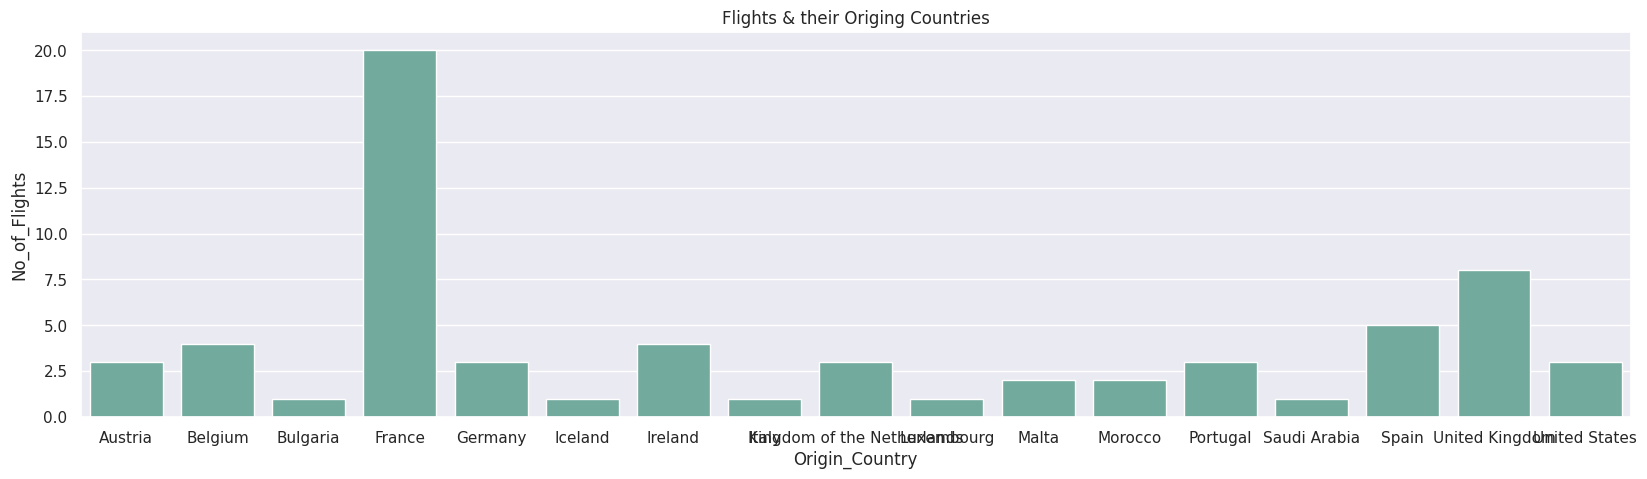

In [3]:
# Importin all the required packages to run the syntax
import urllib.request
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import csv
from itertools import islice
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# Finding the flights above a particular location
count = 0
lat = ""
lon = ""

print("Welcome to the Plane Finder. Here we can show you what airplanes are currently above you.")
time.sleep(1)
print('Finding Planes near the Paris Airport(CDG).')

def start():
	time.sleep(1)
  # URL to load the data of the stated airport
	url = f'https://www.airport-data.com/api/ap_info.json?iata=CDG'
	response = urllib.request.urlopen(url)
	result = json.loads(response.read())
		#print(result)

  # Getting the lats and longs with conditional statement
	if result['status'] == 200:
			lat = result['latitude']
			lon = result['longitude']
			time.sleep(1)
			print(f'{result["name"]} located in {result["location"]}.')
	else:
			print("Error: Invalid airport code. ")
			time.sleep(2)
			start()
	return lat,lon

def place_value(number):
	return ("{:,}".format(number))

lat,lon = start()
time.sleep(1)
deg = '50'
print('')
lamin = float(lat) - (float(deg)/69)
lomin = float(lon) - (float(deg)/54.6)
lamax = float(lat) + (float(deg)/69)
lomax = float(lon) + (float(deg)/54.6)
#conversion from https://www.usgs.gov/faqs/how-much-distance-does-a-degree-minute-and-second-cover-your-maps#:~:text=One%20degree%20of%20latitude%20equals%20approximately%20364%2C000%20feet,second%20equals%2080%20feet.%20Illustration%20showing%20longitude%20convergence

# Getting the flights with the lat and long data collected above
url = f'https://opensky-network.org/api/states/all?lamin={lamin}&lomin={lomin}&lamax={lamax}&lomax={lomax}'
response = urllib.request.urlopen(url)
result = json.loads(response.read())
#print(result)

# Looping the results into diff lists for plotting into diff charts
plane_data = result['states']
co_lat, co_long, flight_name, name = [], [], [], []
for flight in plane_data:
  lats = flight[6]
  lons = flight[5]
  flights = flight[1]
  origin = flight[2]
  co_lat.append(lats)   # Appending the data to the empty lists
  flight_name.append(flights)
  co_long.append(lons)
  name.append(origin)

# Looping through the url result to display the flights and its details
for plane in result['states']:
  if plane[8] == False:

    print(f'{count}) Flight = {plane[1]}')
    print(f'Flight Origin = {plane[2]}')
    print(f'Current Location:')
# This will give us the Lat and longs of the flights
    if plane[6] < 0:
      print(f'\tLatitude = {-plane[6]} S')
    else:
      print(f'\tLatitude = {plane[6]} N')

    if plane[5] < 0:
      print(f'\tLongitude = {-plane[5]} W')
    else:
      print(f'\tLongitude = {plane[5]} E')
# Gives additional plane details
    if float(plane[6]) > float(lat) and float(plane[5]) > float(lon):
      print('Look NE to see it.')
    elif float(plane[6]) < float(lat) and float(plane[5]) > float(lon):
      print('Look SE to see it.')
    elif float(plane[6]) < float(lat) and float(plane[5]) < float(lon):
      print('Look SW to see it.')
    elif float(plane[6]) > float(lat) and float(plane[5]) < float(lon):
      print('Look NW to see it.')
    count += 1
    print(f'\n')
    time.sleep(1)
print(f'There are currently {count} airplanes above your location.')
#print(co_lat)
print("\nCreating a Bar Chart to see the Flights and their Origin Country")
#print(name)

uniq, counts = np.unique(name, return_counts=True)  # This command helps to identify the unique elements within the lists and its respective counts

#print(uniq)    # ['a' 'b']
#print(counts)  # [2 3]

# With the data collected thru the above program we will create a bar plot
# to analyze the number of flights and their various origing countries
# Setting data frame to accomodate for the plotting
df = pd.DataFrame({
        'Origin_Country': uniq,
        'No_of_Flights': counts
})
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(20, 5))

# plot a bar chart
sns.barplot(
      y="No_of_Flights",
      x="Origin_Country",
      data=df,
      estimator=sum,
      ci=None,
      color='#69b3a2');
plt.title("Flights & their Origing Countries")  # Adding a title to he plot
plt.savefig('Flights.png')   # Saving the chart as a png
print("\n*** The Chart to make Analysis is now Ready ***")